# Import Modules

In [8]:
import sys
sys.path.append('../')

import Levels
import Results
from RMatrix import PTBayes
import Resonances
from SpinGroups import SpinGroups

In [9]:
%matplotlib widget

# Basic Fitting Example (WigBayes)

### Setting Mean Parameter Data

In [10]:
A     = 181
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404]
FreqF = 1/15
Freq  = [1/8.9868, 1/8.3065]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

print('Printing Mean Parameters:')
print(MP)

Printing Mean Parameters:
Nuclear Spin        = None
Atomic Number       = None
Atomic Mass Number  = 181
Atomic Mass         = 181.00000 (amu)
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.0666667 (1/eV)

                            3+          4+
Level Densities       0.111274    0.120388
Brody Parameters      1.000000    1.000000
Mean Neutron Width   44.113550   33.386970
Neutron Width DOF     1.000000    1.000000
Mean Gamma Width     55.000000   55.000000
Gamma Width DOF     250.000000  250.000000
Truncation N Width    0.000000    0.000000
Missing Fraction      0.000000    0.000000


### Sample Resonance Ladder

In [11]:
Res, Types, Missed_Res, Missed_Types = MP.sample()

In [12]:
Prior, TPPrior = PTBayes(Res, MP)
# runMaster = Levels.RunMaster(Res.E, MP.EB, Prior, TPPrior, MP.FreqAll)
distributions = MP.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP.EB, Prior, TPPrior, distributions, MP.FreqF)
Posterior, log_total_probability = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Results:

PT-only score =  55.02%
Wigner+PT score =  53.85%

Confusion Matrix:
     A    B  F
A   86   68  0
B  193  236  0
F    6    9  0



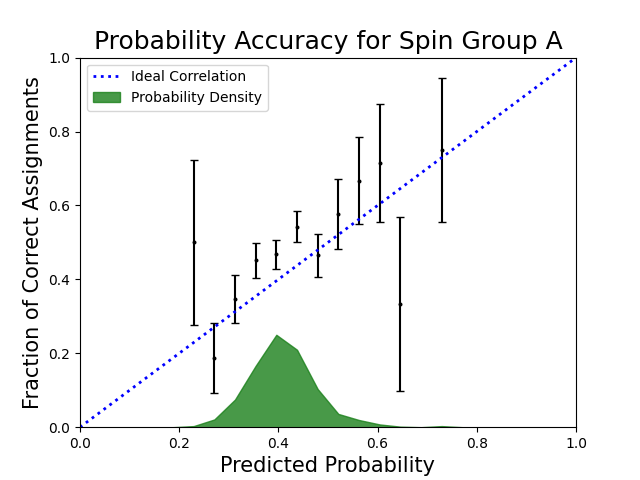

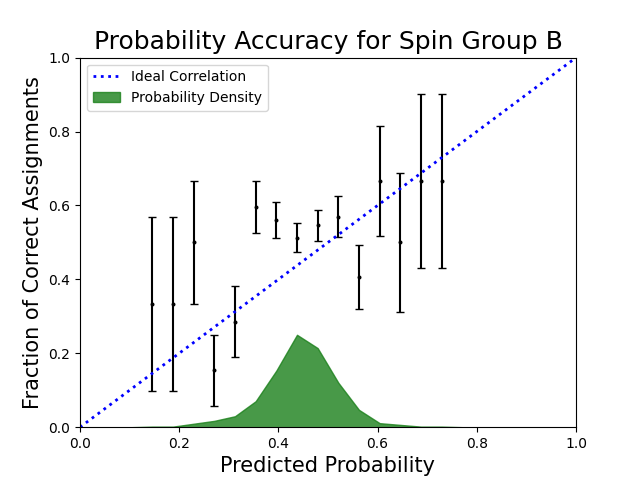

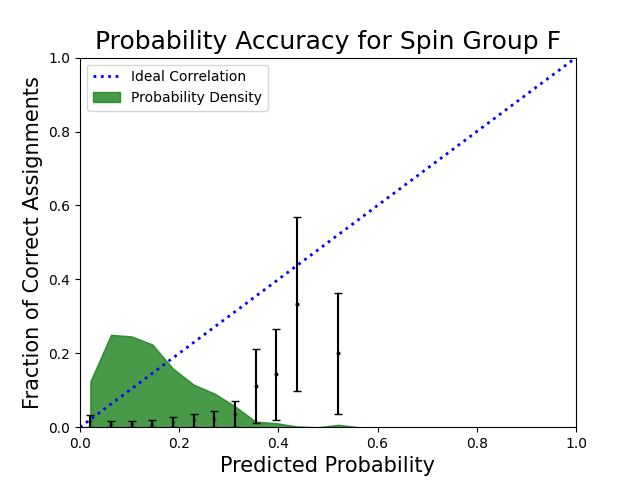

In [13]:
Results.PrintScore(Prior, Types, 'PT-only')
Results.PrintScore(Posterior, Types, 'Wigner+PT')
print()
Results.ConfusionMatrix(Posterior, Types, ['A', 'B', 'F'])
print()
Results.ProbCorrPlot(Posterior, Types, ['A', 'B', 'F'])

In [14]:
print(Posterior)

[[0.4184716  0.48492821 0.09660019]
 [0.37396915 0.33785061 0.28818024]
 [0.30223788 0.35963669 0.33812543]
 ...
 [0.40557884 0.38074763 0.21367353]
 [0.41886555 0.4699968  0.11113766]
 [0.42642756 0.46235274 0.1112197 ]]


# Basic Spingroup Sampling (WigSample)

...